In [1]:
import numpy as np
import torch
import pandas as pd 
import matplotlib.pyplot as plt

import pickle
from tqdm import tqdm 


In [2]:
with open(f'./sample_sigma.pkl', 'rb') as pickle_file:
    samples = pickle.load(pickle_file)
sigma = list(samples.keys())

mean_for_hist = {}
mae = {}
rmse = {}
std = {}
for s in tqdm(sigma):
    mae[s] = []
    rmse[s] = []
    std[s] = []
    mean_for_hist[s] = {}
    with open(f'./script/uncertanties_testing/test_set/test_set_{s}.pkl', 'rb') as pikle_file:
        true_values = pickle.load(pikle_file)
    dict_of_samples = samples[s]
    for key in dict_of_samples.keys():
        mean_of_samples = np.mean(dict_of_samples[key].cpu().numpy())
        true_value = true_values[key]['params'][0]
        mae[s].append(np.abs(mean_of_samples - true_value))
        rmse[s].append((mean_of_samples - true_value)**2)
        std[s].append(np.std(dict_of_samples[key].cpu().numpy()))
        
        if 'samples' in mean_for_hist[s].keys():
            mean_for_hist[s]['samples'].append(mean_of_samples)
            mean_for_hist[s]['true'].append(true_value)
        else:
            mean_for_hist[s]['samples'] = [mean_of_samples]
            mean_for_hist[s]['true'] = [true_value] 
        
    mae[s] = np.mean(mae[s])     
    rmse[s] = np.sqrt(np.mean(rmse[s]))
    std[s] = np.mean(std[s])

100%|██████████| 6/6 [00:36<00:00,  6.00s/it]


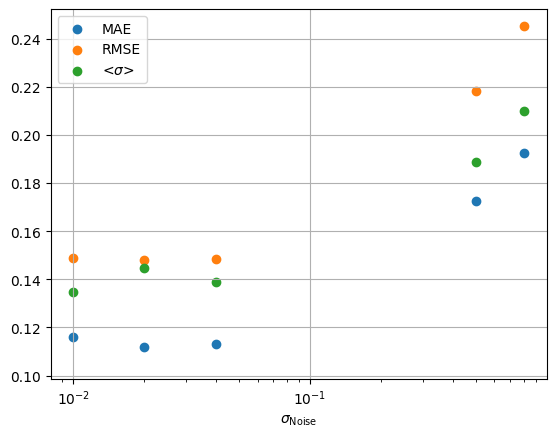

In [5]:
plt.scatter(mae.keys(), mae.values(), label='MAE')
plt.scatter(rmse.keys(), rmse.values(), label='RMSE')
plt.scatter(std.keys(), std.values(), label='<$\sigma$>')
plt.xscale('log')
plt.xlabel(fr'$\sigma_{{\text{{Noise}}}}$')
plt.legend()
plt.grid('dotted')

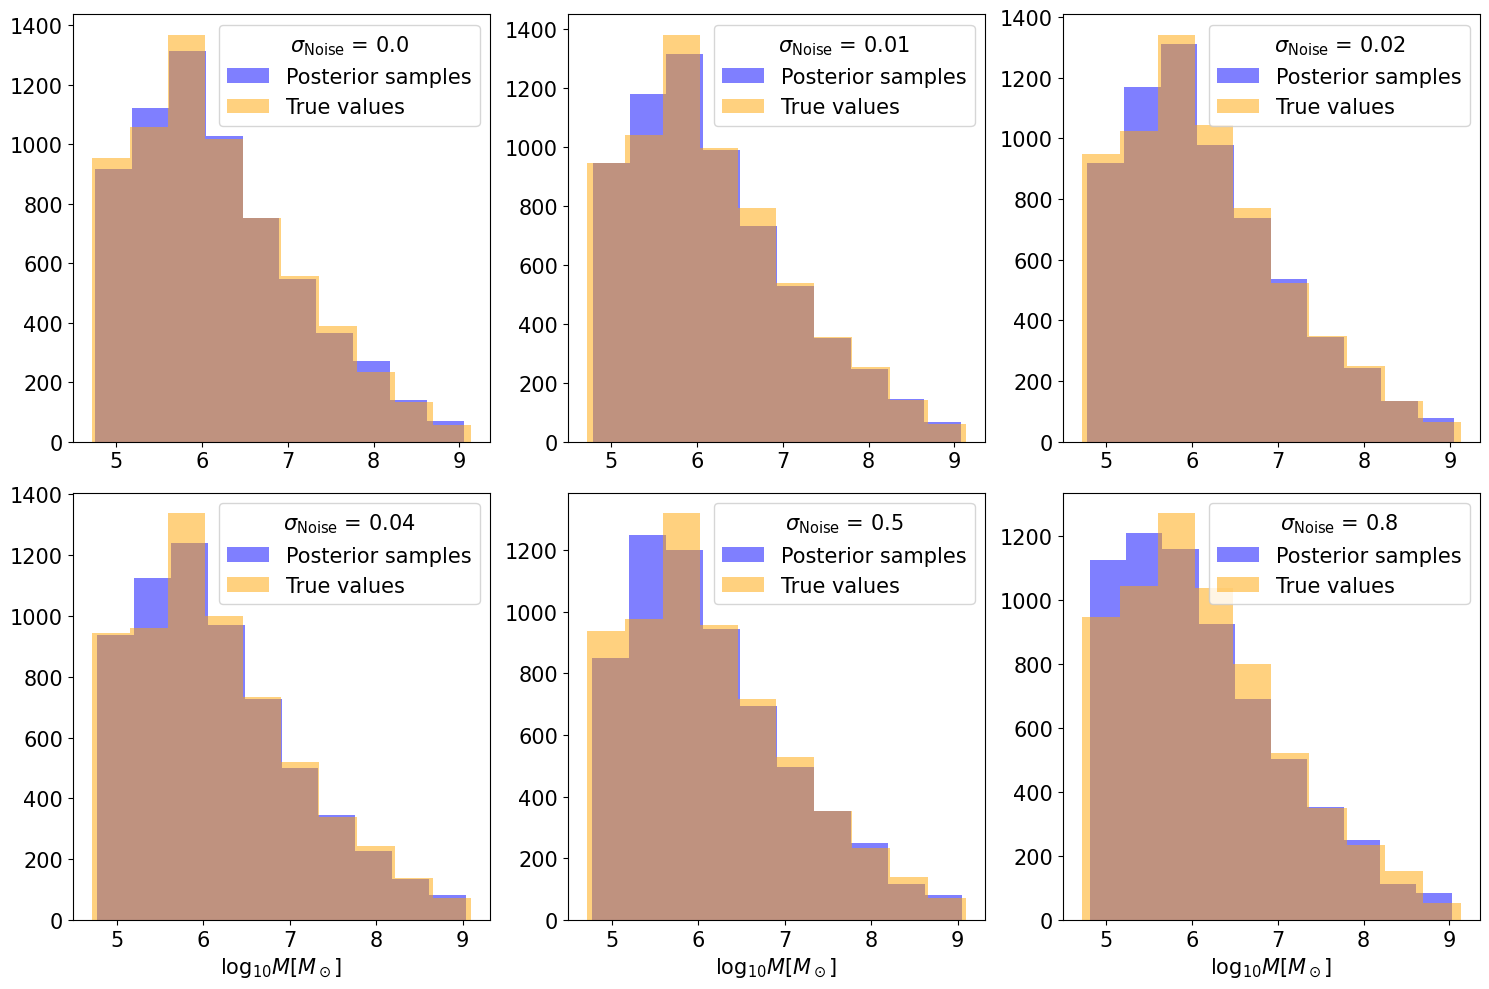

In [15]:
fig = plt.figure(figsize=(15, 10), layout = 'tight')

for i, s in enumerate(sigma):
    ax = fig.add_subplot(2, 3, i+1)
    ax.hist(mean_for_hist[s]['samples'], alpha=0.5, color='blue', label='Posterior samples', )
    ax.hist(mean_for_hist[s]['true'], alpha=0.5, color='orange', label='True values', )
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    # ax.set_yscale('log')
    if i+1 > 3:
        ax.set_xlabel(r'$\text{log}_{10} M [M_\odot] $', fontsize=15)
    legend = ax.legend(title=fr'$\sigma_{{\text{{Noise}}}}$ = {s}',fontsize=15)
    plt.setp(legend.get_title(), fontsize=15, ha='left')
    

In [7]:
dataframe = pd.read_parquet('/export/data/vgiusepp/data/full_dataframe/dataframe/dataframe.parquet')


feh_min, feh_max = dataframe['feh'].min(), dataframe['feh'].max()
ofe_min, ofe_max = dataframe['ofe'].min(), dataframe['ofe'].max()

/tmp/ipykernel_1127653/1501301435.py:22: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(arr), origin='lower', vmin=np.log10(min_arr), vmax=np.log10(max_arr),  extent=[feh_min, feh_max, ofe_min, ofe_max], aspect='auto', cmap='viridis')
/tmp/ipykernel_1127653/1501301435.py:22: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(arr), origin='lower', vmin=np.log10(min_arr), vmax=np.log10(max_arr),  extent=[feh_min, feh_max, ofe_min, ofe_max], aspect='auto', cmap='viridis')
/tmp/ipykernel_1127653/1501301435.py:22: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(arr), origin='lower', vmin=np.log10(min_arr), vmax=np.log10(max_arr),  extent=[feh_min, feh_max, ofe_min, ofe_max], aspect='auto', cmap='viridis')
/tmp/ipykernel_1127653/1501301435.py:22: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(arr), origin='lower', vmin=np.log10(min_arr), vmax=np.log10(max_arr),  extent=[feh_min, feh_max, ofe_mi

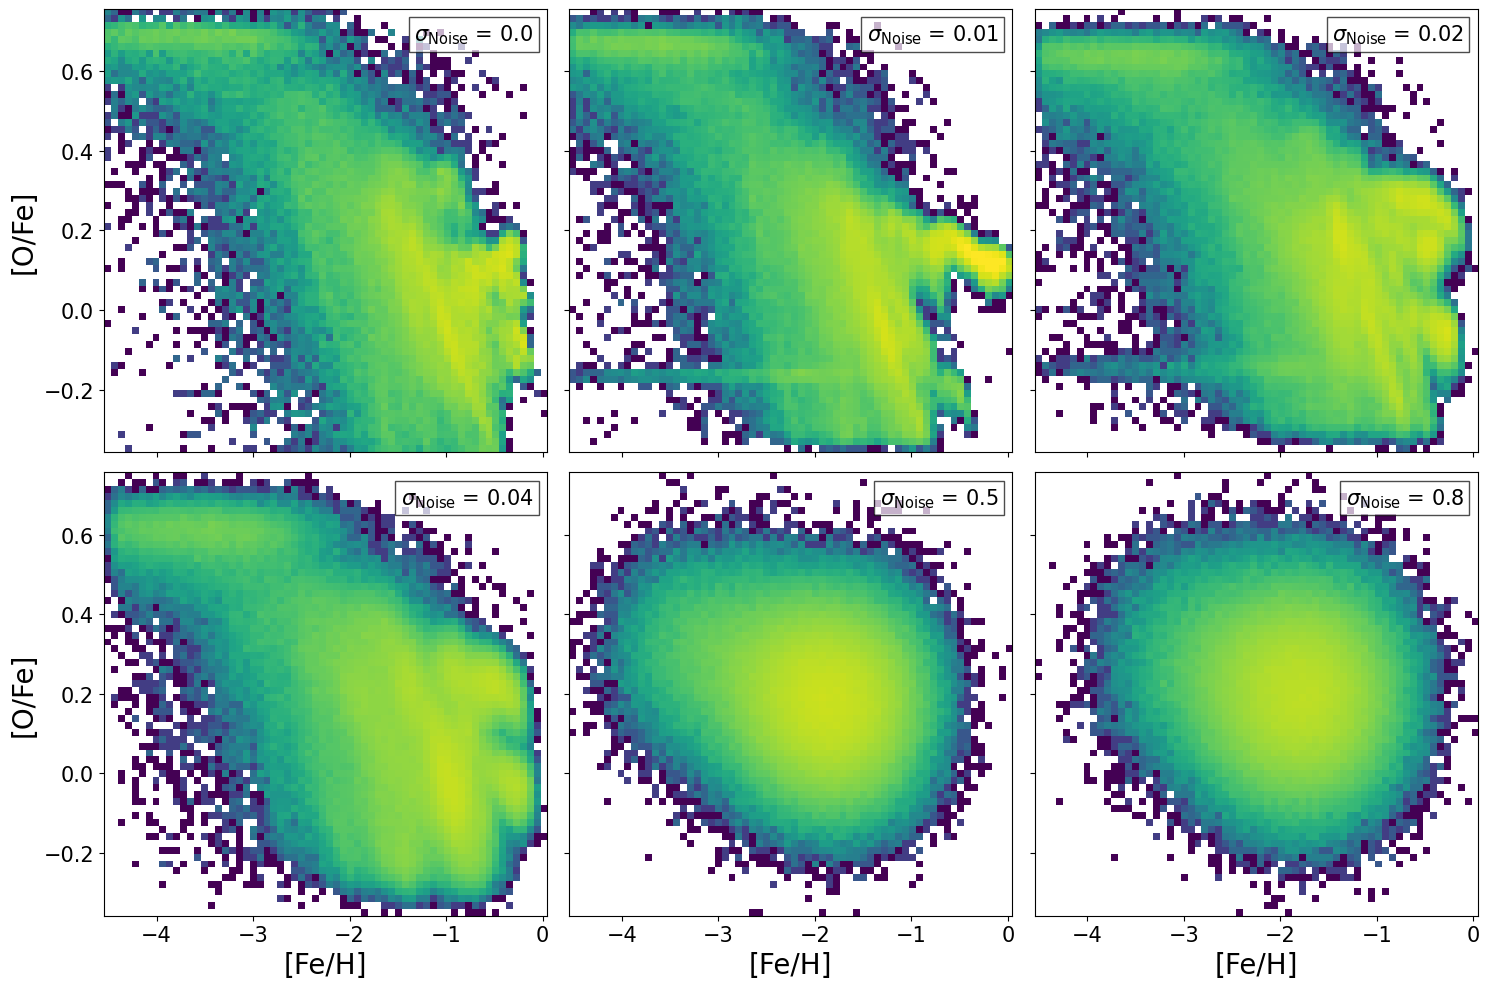

In [19]:
min_arr = 1000
max_arr = 0
for i, s in enumerate(sigma):
    # Load dictionary from a pickle file
    with open(f'./script/uncertanties_testing/test_set/test_set_{s}.pkl', 'rb') as pickle_file:
        data = pickle.load(pickle_file)
    arr = data[(0, 16)]['x'].T
    if arr[arr != 0].min() < min_arr:
        min_arr = arr[arr != 0].min()
    if arr.max() > max_arr:
        max_arr = arr.max() 

fig = plt.figure(figsize=(15, 10), layout='tight')
num_rows = 2
num_cols = 3
for i, s in enumerate(sigma):
    # Load dictionary from a pickle file
    with open(f'./script/uncertanties_testing/test_set/test_set_{s}.pkl', 'rb') as pickle_file:
        data = pickle.load(pickle_file)
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    arr = data[(0, 0)]['x'].T
    ax.imshow(np.log10(arr), origin='lower', vmin=np.log10(min_arr), vmax=np.log10(max_arr),  extent=[feh_min, feh_max, ofe_min, ofe_max], aspect='auto', cmap='viridis')
    
    
    # # Add text inside a box
    # ax.text(x=-0.5, y=0.6, s=rf'$\sigma={s}$', 
    #     transform=ax.transAxes, fontsize=15, verticalalignment='top',
    #     bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))
     # Add text inside a box using annotate
    ax.annotate(
        fr'$\sigma_{{\text{{Noise}}}}$ = {s}', xy=(1, 1), xycoords='axes fraction', fontsize=15,
        xytext=(-10, -10), textcoords='offset points', ha='right', va='top',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')
    )
    
    # Set x-tick labels only for the bottom row
    if i // num_cols == num_rows - 1:
        ax.set_xlabel('[Fe/H]', fontsize=20)
        ax.tick_params(axis='x', labelsize=15)
    else:
        ax.set_xticklabels([])
    
    # Set y-tick labels only for the first column
    if i % num_cols == 0:
        ax.set_ylabel('[O/Fe]', fontsize=20)
        ax.tick_params(axis='y', labelsize=15)
    else:
        ax.set_yticklabels([])
    


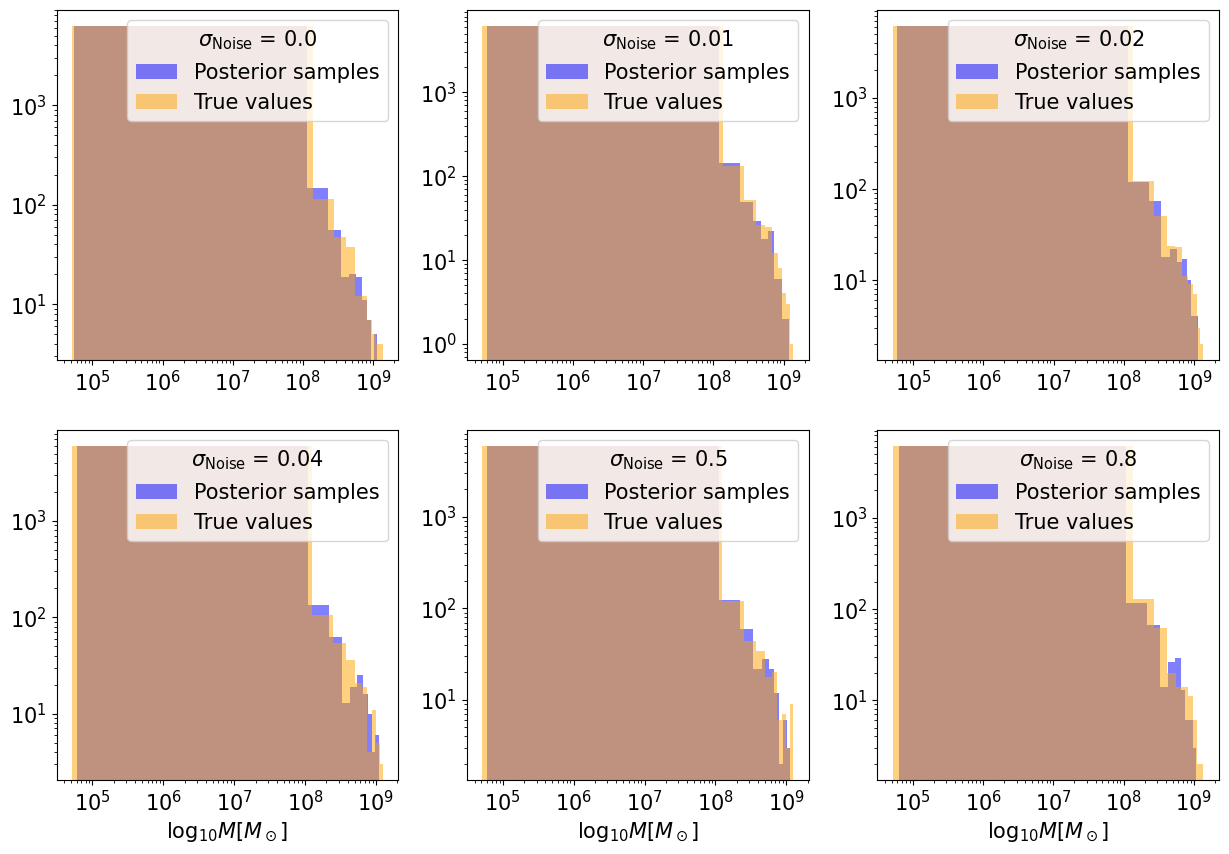

In [21]:
fig = plt.figure(figsize=(15, 10))

for i, s in enumerate(sigma):
    ax = fig.add_subplot(2, 3, i+1)
    ax.hist(10**np.array(mean_for_hist[s]['samples']), alpha=0.5, color='blue', label='Posterior samples', )
    ax.hist(10**np.array(mean_for_hist[s]['true']), alpha=0.5, color='orange', label='True values', )
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    # ax.set_yscale('log')
    if i+1 > 3:
        ax.set_xlabel(r'$\text{log}_{10} M [M_\odot] $', fontsize=15)
    legend = ax.legend(title=fr'$\sigma_{{\text{{Noise}}}}$ = {s}',fontsize=15)
    plt.setp(legend.get_title(), fontsize=15, ha='left')
    

Integral of the power law function: 0.24516090568558246


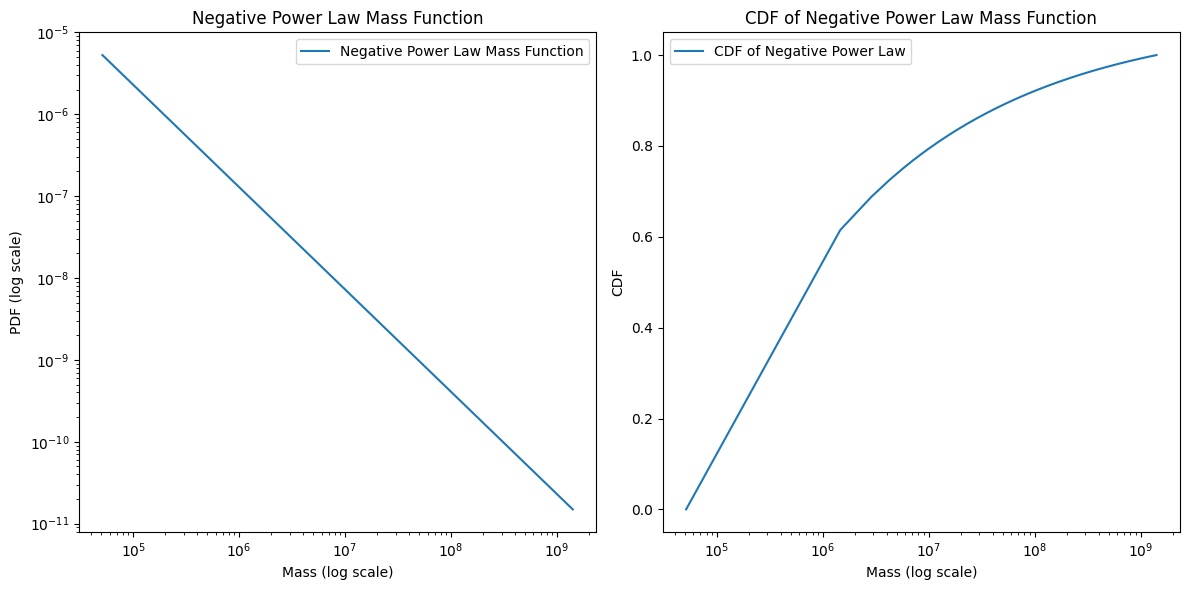

In [57]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1.25
m_max = 1.41e9
m_min = 10**4.71

def pdf(m, m_max, m_min, alpha):
    """
    Power law mass function
    
    Parameters:
    m: mass of the galaxy
    m_max: maximum mass of the galaxy
    m_min: minimum mass of the galaxy
    alpha: power law index of the mass function
    
    Returns:
    pdf: power law mass function value at mass m
    """
    norm_const = (m_max**(1-alpha) - m_min**(1-alpha))/(1-alpha) 
    return (1/norm_const)* m**(-alpha)

def integral_power_law(m_max, m_min, alpha):
    """
    Integral of the power law mass function
    
    Parameters:
    m_max: maximum mass of the galaxy
    m_min: minimum mass of the galaxy
    alpha: power law index of the mass function
    
    Returns:
    integral: integral of the power law mass function over the range [m_min, m_max]
    """
    if alpha == 1:
        return np.log(m_max / m_min)
    else:
        return (m_max**(1-alpha) - m_min**(1-alpha)) / (1-alpha)

def cdf(m, m_max, m_min, alpha):
    """
    Cumulative distribution function of the power law mass function
    
    Parameters:
    m: mass of the galaxy
    m_max: maximum mass of the galaxy
    m_min: minimum mass of the galaxy
    alpha: power law index of the mass function
    
    Returns:
    cdf: cumulative distribution function value at mass m
    """
    if alpha == 1:
        return (np.log(m) - np.log(m_min)) / (np.log(m_max) - np.log(m_min))
    else:
        return (m**(1-alpha) - m_min**(1-alpha)) / (m_max**(1-alpha) - m_min**(1-alpha))

# Generate data points
m_values = np.linspace(m_min, m_max, 1000)
pdf_values = pdf(m=m_values, m_max=m_max, m_min=m_min, alpha=alpha)
cdf_values = cdf(m=m_values, m_max=m_max, m_min=m_min, alpha=alpha)

# Compute the integral of the power law function
integral_value = integral_power_law(m_max, m_min, alpha)
print(f"Integral of the power law function: {integral_value}")

# Plot the negative power law function (PDF)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(m_values, pdf_values, label='Negative Power Law Mass Function')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mass (log scale)')
plt.ylabel('PDF (log scale)')
plt.title('Negative Power Law Mass Function')
plt.legend()

# Plot the CDF
plt.subplot(1, 2, 2)
plt.plot(m_values, cdf_values, label='CDF of Negative Power Law')
plt.xscale('log')
plt.xlabel('Mass (log scale)')
plt.ylabel('CDF')
plt.title('CDF of Negative Power Law Mass Function')
plt.legend()

plt.tight_layout()
plt.show()